## Detecção de placas Veiculares

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

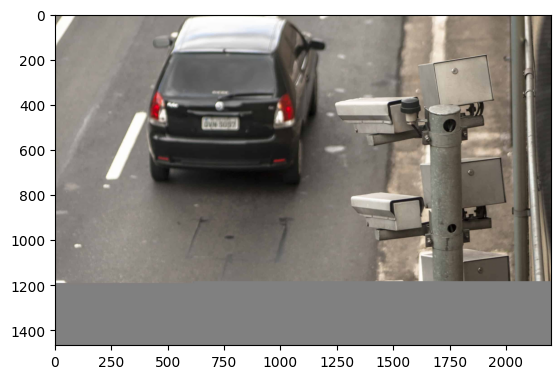

In [3]:
# 1. Carregar imagem (coloque a imagem na mesma pasta do script)
imagem = cv2.imread('Images\placa-1-borrada.jpg')
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem_rgb)

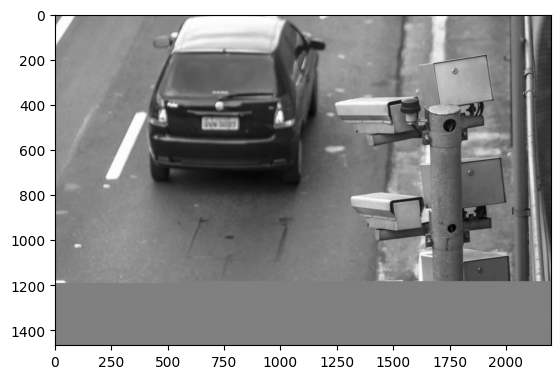

In [4]:
gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

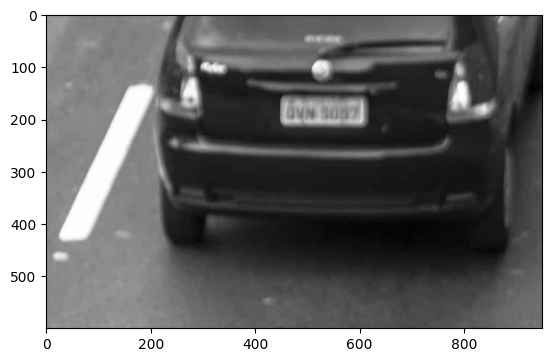

In [5]:
gray_cropped = gray[300:900, 200:1150]
color_cropped = imagem[300:900, 200:1150].copy()
plt.imshow(color_cropped)
plt.imshow(gray_cropped, cmap='gray')

In [6]:
# Equalização de histograma (melhora contraste em imagens escuras/borradas)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray_eq = clahe.apply(gray_cropped)

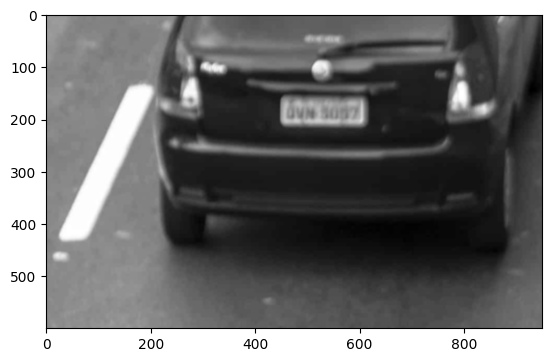

In [7]:
# 2. Suavização
blur = cv2.GaussianBlur(gray_cropped, (5, 5), 0)
plt.imshow(blur, cmap='gray')

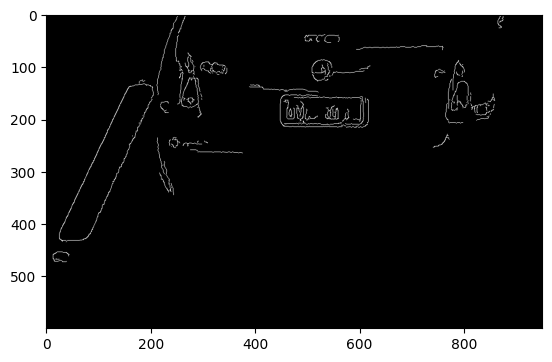

In [8]:
# 3. Detecção de bordas
edges = cv2.Canny(blur, 15, 100)
plt.imshow(edges, cmap='gray')

In [ ]:
# 4. Encontrar contornos
contornos, _ = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



In [27]:
# Contornos com parâmetros mais permissivos
for c in contornos:
    x, y, w, h = cv2.boundingRect(c)
    area = cv2.contourArea(c)
    aspect_ratio = w / float(h)

    print(f'Área: {area:.1f} | AR: {aspect_ratio:.2f}')

    # Ajuste esses valores baseado nos prints!
    if 10 < area < 35 and 10 < aspect_ratio < 5:
        cv2.rectangle(color_cropped, (x, y), (x + w, y + h), (0, 255, 0), 2)

Área: 1.0 | AR: 4.00
Área: 13.0 | AR: 1.60
Área: 3.0 | AR: 0.35
Área: 31.5 | AR: 0.80
Área: 7.0 | AR: 0.56
Área: 2.0 | AR: 0.50
Área: 3.0 | AR: 0.25
Área: 0.0 | AR: 21.75
Área: 0.0 | AR: 7.50
Área: 0.0 | AR: 1.00
Área: 3.0 | AR: 1.25
Área: 6.0 | AR: 5.29
Área: 1.5 | AR: 1.40
Área: 1.0 | AR: 0.50
Área: 1.5 | AR: 0.33
Área: 5.0 | AR: 0.80
Área: 1.0 | AR: 0.21
Área: 1.5 | AR: 1.33
Área: 0.0 | AR: 0.50
Área: 16.0 | AR: 1.23
Área: 0.0 | AR: 10.00
Área: 0.0 | AR: 3.00
Área: 0.0 | AR: 1.00
Área: 0.0 | AR: 2.50
Área: 0.0 | AR: 1.00
Área: 0.0 | AR: 1.00
Área: 26.0 | AR: 0.49
Área: 3.5 | AR: 2.57
Área: 0.0 | AR: 1.00
Área: 0.0 | AR: 1.00
Área: 0.0 | AR: 16.50
Área: 2.5 | AR: 5.50
Área: 0.0 | AR: 0.33
Área: 0.0 | AR: 5.80
Área: 4.0 | AR: 6.00
Área: 0.5 | AR: 2.50
Área: 5.5 | AR: 3.00
Área: 0.0 | AR: 1.00
Área: 0.5 | AR: 1.00
Área: 4.0 | AR: 3.29
Área: 2.0 | AR: 0.75
Área: 0.0 | AR: 1.50
Área: 3.5 | AR: 1.20
Área: 2.0 | AR: 2.67
Área: 9.0 | AR: 0.52
Área: 4.0 | AR: 0.39
Área: 52.0 | AR: 0.41
Área:

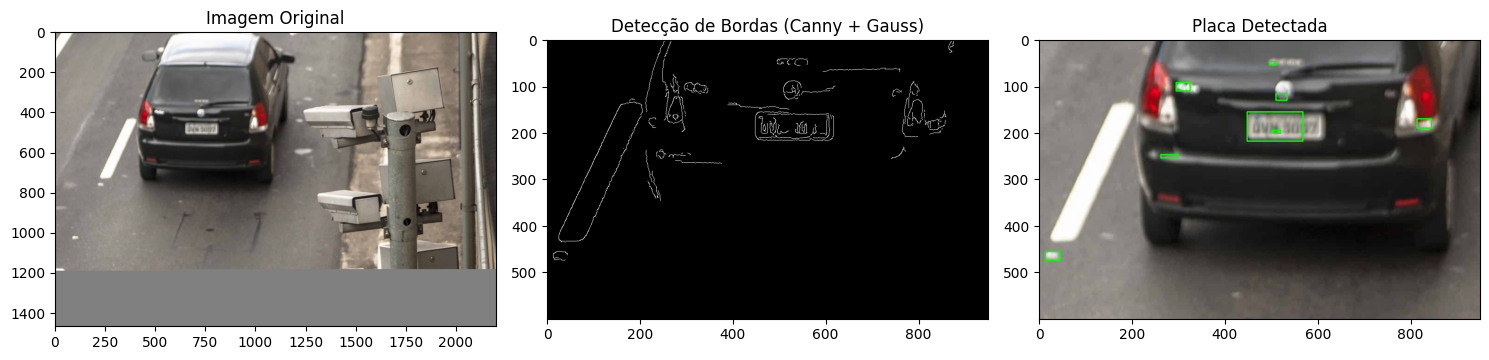

In [28]:
# 6. Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(imagem_rgb)
plt.title("Imagem Original")

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title("Detecção de Bordas (Canny + Gauss)")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(color_cropped, cv2.COLOR_BGR2RGB))
plt.title("Placa Detectada")

plt.tight_layout()
plt.show()